In [169]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import datetime
# this allows plots to appear directly in the notebook
%matplotlib inline

In [170]:
# get the data
pd.options.display.max_columns = 9999
df = pd.read_csv('E:/Transit-Casa-Alex/Output/Modeling/2009/Tenth_Modeling_Data.csv')
df.head()

,Unnamed: 0,MONTH,DOW,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,IMP_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_FROMS,BART_TOS,CALTRAIN_OFF,CALTRAIN_ON,MUNI_RAIL_ALIGHTINGS,MUNI_RAIL_BOARDINGS,NUM_BUS_STOPS,EDD_EMP,FREQ_S,HOURLY_AVG_ON_PARK,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,12_HR_OFF_PUB_PARK,1_HR_OFF_PUB_PARK,2_HR_OFF_PUB_PARK,3_HR_OFF_PUB_PARK,4_HR_OFF_PUB_PARK,DAY_OFF_PUB_PARK,DAY_DISCOUNT_OFF_PUB_PARK,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_RAIL_AVG,12_HR_OFF_PUB_PARK_LOG,1_HR_OFF_PUB_PARK_LOG,2_HR_OFF_PUB_PARK_LOG,3_HR_OFF_PUB_PARK_LOG,4_HR_OFF_PUB_PARK_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,CAPACITY_LOG,CROWDED_LOG,CROWDHOURS_LOG,DAY_DISCOUNT_OFF_PUB_PARK_LOG,DAY_OFF_PUB_PARK_LOG,DWELL_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FARE_LOG,FREQ_S_LOG,FULLFARE_REV_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,HOURLY_AVG_ON_PARK_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,MUNI_RAIL_ALIGHTINGS_LOG,MUNI_RAIL_AVG_LOG,MUNI_RAIL_BOARDINGS_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_LOG,ON_LOG,ONTIME5_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,PASSDELAY_ARR_LOG,PASSDELAY_DEP_LOG,PASSHOURS_LOG,PASSMILES_LOG,POP_DEN_ACS_LOG,RDBRDNGS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_LOG,RUNSPEED_S_LOG,RUNTIME_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_LOG,TOTSPEED_S_LOG,TOTTIME_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,VC_LOG,WAITHOURS_LOG
0,0,2009-10-01,1,SFMTA,016AX,0,3,22,18.0,13,2,0.0,13.0,3612,NORIEGA A EXP,3,48TH AVENUE,10.666667,2.0,CYRIL MAGNIN ST & MARKET ST,5TH ST NORTH&MARKET ST NW,0,1,1.0,-3.875743,-0.070542,0.0,49.476280,0.00,0.000000,0.00,49.476280,0.000,0.000,0.00,0.00,0.00,0.00,0.737434,258.292460,0.240741,0.240741,258.292460,0.000000,20.102898,23.016448,516.584921,287.502463,91.157255,0.0,21.049339,0.000000,0.0,189.0,0.000294,0.0,0.0,6317.0,4775.0,0.164817,0.835183,1.584002,129.001163,81.440025,97.511565,4673.0,4772.0,0.0,0.0,2496.0,4136.0,10.0,7134.0,5.625,350.0,0.0,39.308818,199.634504,232.201161,4068.828658,717.267880,32.287304,963.525560,144.291088,1437.649130,0.912738,0.650953,0.003761,0.278084,0.067202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.313950,1468.019464,29.4,0.320246,0,129.266601,4.869583,4722.5,0.0,3316.0,NaN,NaN,NaN,NaN,NaN,8.460305,0.949339,3.414443,8.449771,8.47073,0.0,0.0,0.0,5.247024,0.0,0.0,NaN,NaN,3.921504,0.0,8.872768,3.696570,5.301485,5.451901,8.311356,1.098612,1.89085,6.249174,2.456736,4.412071,5.860786,6.576843,4.590174,3.505176,6.871636,7.822845,8.106816,8.327726,2.397895,0.607144,0.215709,5.557957,0.552409,4.978739,7.271460,0.277818,4.523496,5.664704,3.049410,0.000000,4.867543,0.0,2.851513,7.292350,0.000000,0.000000,0.000000,0.000000,0.648536,0.501353,0.003754,0.245362,0.065040,0.000000,0.000000,3.921504,0.000000,8.471359,8.751158,0.152564,0.000294,3.178739
1,1,2009-10-01,1,SFMTA,016AX,0,4,22,0.0,13,0,0.0,13.0,7305,NORIEGA A EXP,3,48TH AVENUE,10.666667,2.0,EDDY ST & CYRIL MAGNIN ST,NaN,0,0,Na

In [171]:
print(sum(df['ON'].dropna()))
print(sum(df['OFF'].dropna()))
print(sum(df['ON'].dropna()) - sum(df['OFF'].dropna()))
print(((sum(df['ON'].dropna()) - sum(df['OFF'].dropna()))/sum(df['ON'].dropna()))*100)

1455658.53303
1445898.26926
9760.26376851
0.670505035833


In [147]:
for column in df.columns.sort_values():
    print(column)

12_HR_OFF_PUB_PARK
12_HR_OFF_PUB_PARK_LOG
1_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK_LOG
2_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK_LOG
3_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK_LOG
4_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK_LOG
AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_HH_SIZE
AVG_HH_SIZE_LOG
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
AVG_TT_TO_WORK_MINUTES_LOG
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DAY_DISCOUNT_OFF_PUB_PARK
DAY_DISCOUNT_OFF_PUB_PARK_LOG
DAY_OFF_PUB_PARK
DAY_OFF_PUB_PARK_LOG
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HOURLY_AVG_ON

In [112]:
sns.pairplot?

In [172]:
len(df[['ON','EMP_WAC_DEN']].dropna())

17182

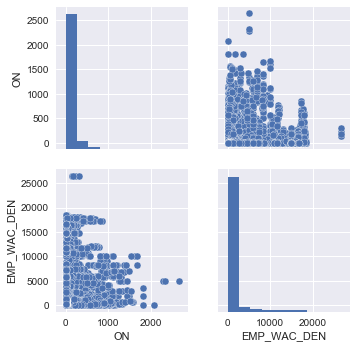

In [173]:
sns.pairplot(df[['ON','EMP_WAC_DEN']].dropna())

17020


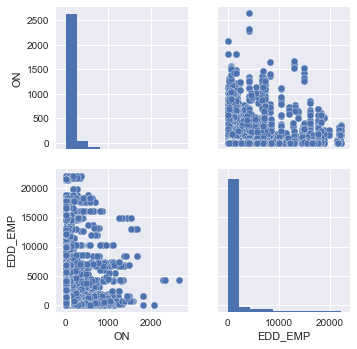

In [174]:
print(len(df[['ON','EDD_EMP']].dropna()))
sns.pairplot(df[['ON','EDD_EMP']].dropna())

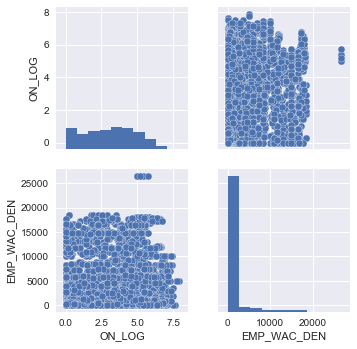

In [175]:
sns.pairplot(df[['ON_LOG','EMP_WAC_DEN']].dropna())

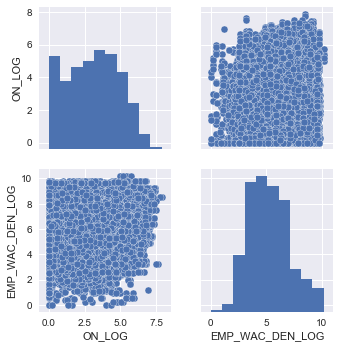

In [176]:
sns.pairplot(df[['ON_LOG','EMP_WAC_DEN_LOG']].dropna())

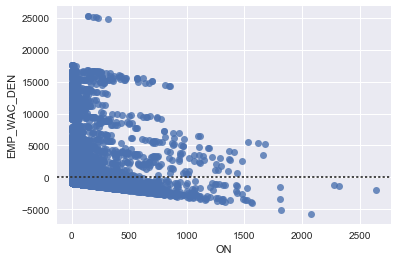

In [177]:
sns.residplot('ON','EMP_WAC_DEN',data = df)

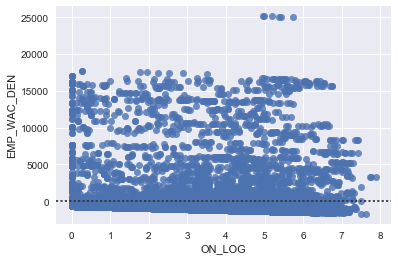

In [178]:
sns.residplot('ON_LOG','EMP_WAC_DEN',data = df)

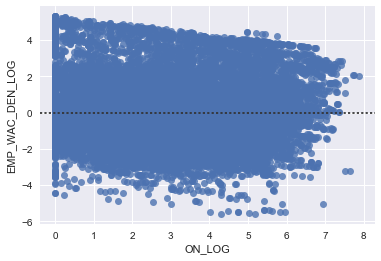

In [179]:
sns.residplot('ON_LOG','EMP_WAC_DEN_LOG',data = df)

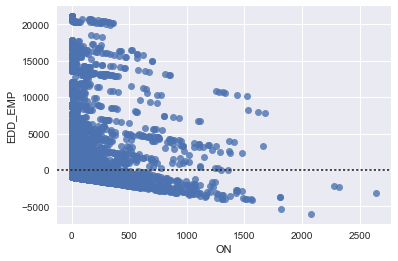

In [180]:
sns.residplot('ON','EDD_EMP',data = df)

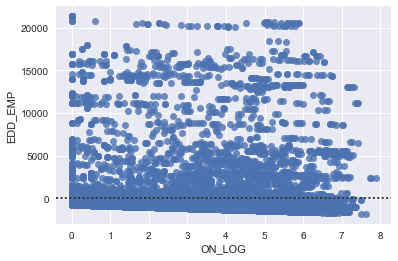

In [181]:
sns.residplot('ON_LOG','EDD_EMP',data = df)

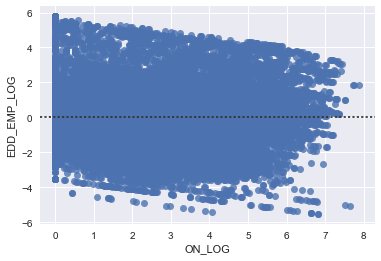

In [182]:
sns.residplot('ON_LOG','EDD_EMP_LOG',data = df)

In [183]:
mod = smf.ols(formula="ON_LOG \
                       ~ EMP_WAC_DEN_LOG \
                       - 1",
                        data = df)

res1 = mod.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                 ON_LOG   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 4.715e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:37:43   Log-Likelihood:                -34918.
No. Observations:               17182   AIC:                         6.984e+04
Df Residuals:                   17181   BIC:                         6.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
EMP_WAC_DEN_LOG     0.5483      0.003    2

In [184]:
mod = smf.ols(formula="ON_LOG \
                       ~ EDD_EMP_LOG \
                       - 1",
                        data = df)

res2 = mod.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 ON_LOG   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 4.464e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:37:45   Log-Likelihood:                -34897.
No. Observations:               17020   AIC:                         6.980e+04
Df Residuals:                   17019   BIC:                         6.980e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
EDD_EMP_LOG     0.5530      0.003    211.289      

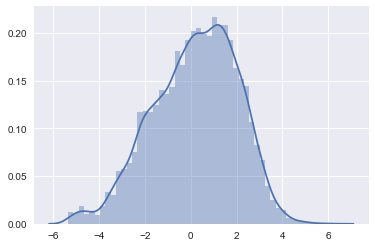

In [185]:
sns.distplot(res1.resid)

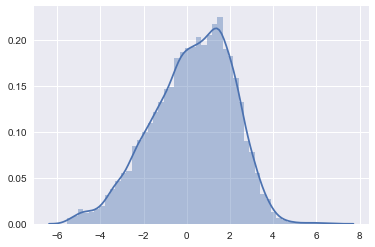

In [186]:
sns.distplot(res2.resid)

In [163]:
for column in df.columns.sort_values():
    print(column)

12_HR_OFF_PUB_PARK
12_HR_OFF_PUB_PARK_LOG
1_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK_LOG
2_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK_LOG
3_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK_LOG
4_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK_LOG
AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_HH_SIZE
AVG_HH_SIZE_LOG
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
AVG_TT_TO_WORK_MINUTES_LOG
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DAY_DISCOUNT_OFF_PUB_PARK
DAY_DISCOUNT_OFF_PUB_PARK_LOG
DAY_OFF_PUB_PARK
DAY_OFF_PUB_PARK_LOG
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HOURLY_AVG_ON

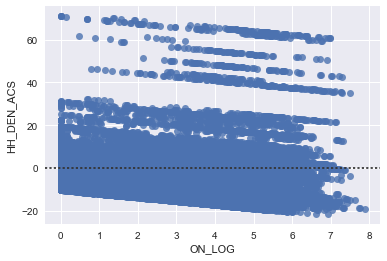

In [207]:
sns.residplot('ON_LOG','HH_DEN_ACS',data = df)

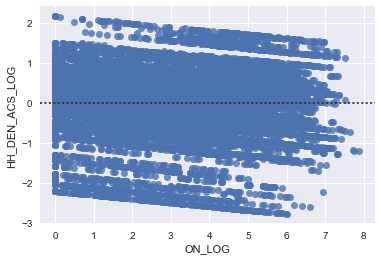

In [208]:
sns.residplot('ON_LOG','HH_DEN_ACS_LOG',data = df)

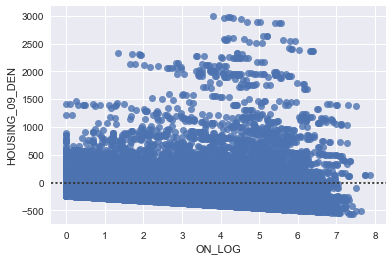

In [209]:
sns.residplot('ON_LOG','HOUSING_09_DEN',data = df)

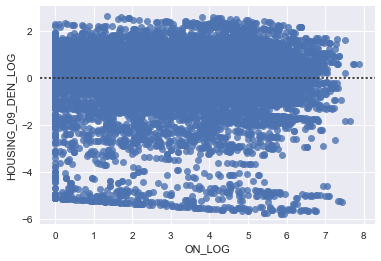

In [210]:
sns.residplot('ON_LOG','HOUSING_09_DEN_LOG',data = df)

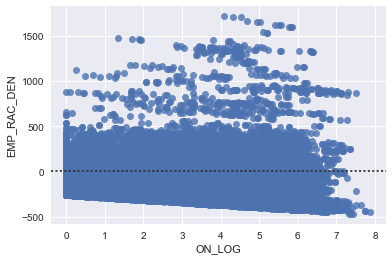

In [211]:
sns.residplot('ON_LOG','EMP_RAC_DEN',data = df)

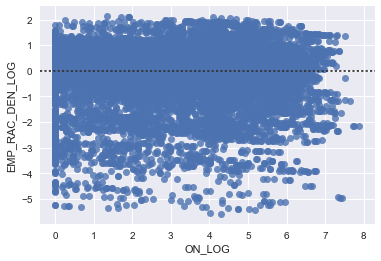

In [212]:
sns.residplot('ON_LOG','EMP_RAC_DEN_LOG',data = df)

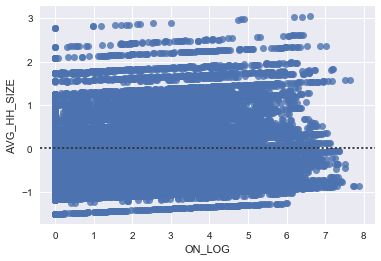

In [214]:
sns.residplot('ON_LOG','AVG_HH_SIZE',data = df)

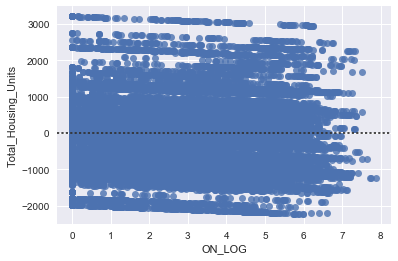

In [216]:
sns.residplot('ON_LOG','Total_Housing_Units',data = df)

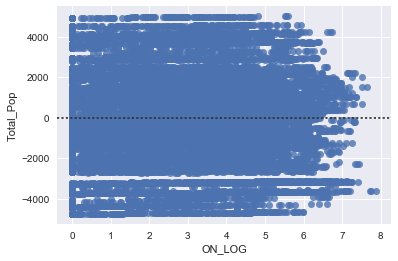

In [218]:
sns.residplot('ON_LOG','Total_Pop',data = df)

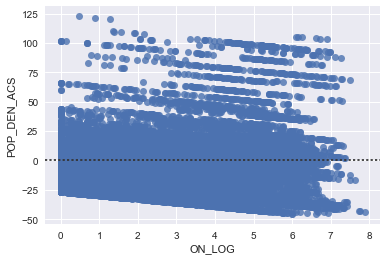

In [219]:
sns.residplot('ON_LOG','POP_DEN_ACS',data = df)

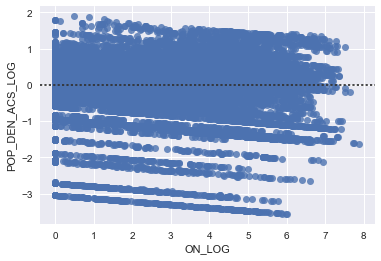

In [220]:
sns.residplot('ON_LOG','POP_DEN_ACS_LOG',data = df)

In [232]:
mod = smf.ols(formula="ON_LOG \
                       ~ Total_Pop \
                       - 1",
                        data = df)

res1 = mod.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                 ON_LOG   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 2.659e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:26:05   Log-Likelihood:                -38225.
No. Observations:               17182   AIC:                         7.645e+04
Df Residuals:                   17181   BIC:                         7.646e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Total_Pop      0.0005   3.26e-06    163.071      0.0

In [233]:
mod = smf.ols(formula="ON_LOG \
                       ~ POP_DEN_ACS_LOG \
                       - 1",
                        data = df)

res2 = mod.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 ON_LOG   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 4.725e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:26:06   Log-Likelihood:                -34905.
No. Observations:               17182   AIC:                         6.981e+04
Df Residuals:                   17181   BIC:                         6.982e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
POP_DEN_ACS_LOG     0.8827      0.004    2

In [234]:
mod = smf.ols(formula="ON_LOG \
                       ~ HH_DEN_ACS_LOG \
                       - 1",
                        data = df)

res3 = mod.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                 ON_LOG   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 4.595e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:26:07   Log-Likelihood:                -35079.
No. Observations:               17182   AIC:                         7.016e+04
Df Residuals:                   17181   BIC:                         7.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
HH_DEN_ACS_LOG     1.1469      0.005    214.

In [235]:
mod = smf.ols(formula="ON_LOG \
                       ~ HOUSING_09_DEN_LOG \
                       - 1",
                        data = df)

res4 = mod.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                 ON_LOG   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 4.817e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:26:11   Log-Likelihood:                -34782.
No. Observations:               17182   AIC:                         6.957e+04
Df Residuals:                   17181   BIC:                         6.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
HOUSING_09_DEN_LOG     0.5484      0

In [236]:
mod = smf.ols(formula="ON_LOG \
                       ~ EMP_RAC_DEN_LOG \
                       - 1",
                        data = df)

res5 = mod.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:                 ON_LOG   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 4.775e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:26:11   Log-Likelihood:                -34759.
No. Observations:               17144   AIC:                         6.952e+04
Df Residuals:                   17143   BIC:                         6.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
EMP_RAC_DEN_LOG     0.5480      0.003    2

In [237]:
mod = smf.ols(formula="ON_LOG \
                       ~ AVG_HH_SIZE \
                       - 1",
                        data = df)

res6 = mod.fit()
print(res6.summary())



                            OLS Regression Results                            
Dep. Variable:                 ON_LOG   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                 3.191e+04
Date:                Mon, 17 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:26:12   Log-Likelihood:                -37239.
No. Observations:               17182   AIC:                         7.448e+04
Df Residuals:                   17181   BIC:                         7.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AVG_HH_SIZE     1.0669      0.006    178.643      

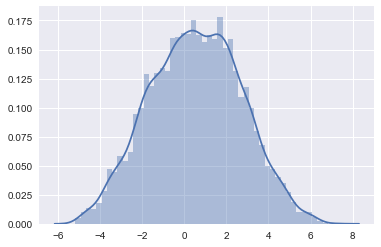

In [226]:
sns.distplot(res1.resid)

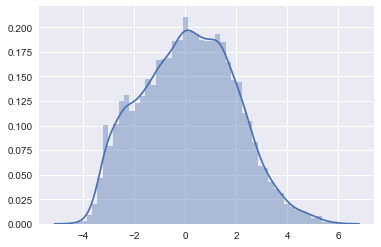

In [227]:
sns.distplot(res2.resid)

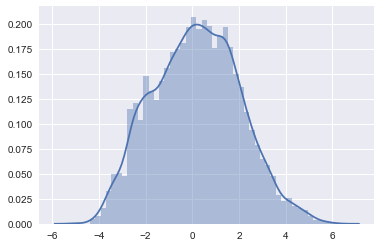

In [238]:
sns.distplot(res3.resid)

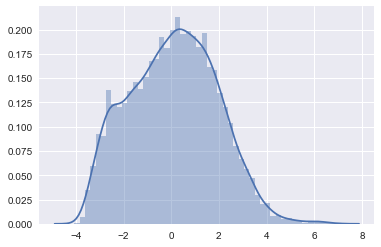

In [239]:
sns.distplot(res4.resid)

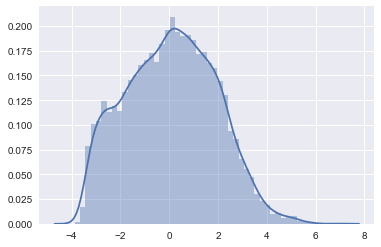

In [240]:
sns.distplot(res5.resid)

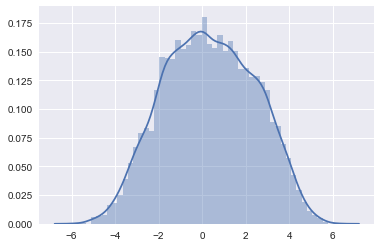

In [241]:
sns.distplot(res6.resid)

In [242]:
for column in df.columns.sort_values():
    print(column)

12_HR_OFF_PUB_PARK
12_HR_OFF_PUB_PARK_LOG
1_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK_LOG
2_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK_LOG
3_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK_LOG
4_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK_LOG
AGENCY_ID
ARRIVAL_TIME_DEV
AVG_BART
AVG_BART_LOG
AVG_HH_SIZE
AVG_HH_SIZE_LOG
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
AVG_TT_TO_WORK_MINUTES_LOG
BART_FROMS
BART_FROMS_LOG
BART_TOS
BART_TOS_LOG
BIKERACK
CALTRAIN_AVG
CALTRAIN_AVG_LOG
CALTRAIN_OFF
CALTRAIN_OFF_LOG
CALTRAIN_ON
CALTRAIN_ON_LOG
CAPACITY
CAPACITY_LOG
CROWDED
CROWDED_LOG
CROWDHOURS
CROWDHOURS_LOG
DAY_DISCOUNT_OFF_PUB_PARK
DAY_DISCOUNT_OFF_PUB_PARK_LOG
DAY_OFF_PUB_PARK
DAY_OFF_PUB_PARK_LOG
DEPARTURE_TIME_DEV
DIR
DOORCYCLES
DOW
DWELL
DWELL_LOG
DWELL_S
DWELL_S_LOG
EDD_EMP
EDD_EMP_LOG
EDHLTH_RAC_DEN
EDHLTH_RAC_DEN_LOG
EDHLTH_WAC_DEN
EDHLTH_WAC_DEN_LOG
EMP_RAC_DEN
EMP_RAC_DEN_LOG
EMP_WAC_DEN
EMP_WAC_DEN_LOG
EOL
EXCLUDE
FARE
FARE_LOG
FREQ_S
FREQ_S_LOG
FULLFARE_REV
FULLFARE_REV_LOG
HEADWAY_S
HEADWAY_S_LOG
HH_DEN_ACS
HH_DEN_ACS_LOG
HOURLY_AVG_ON

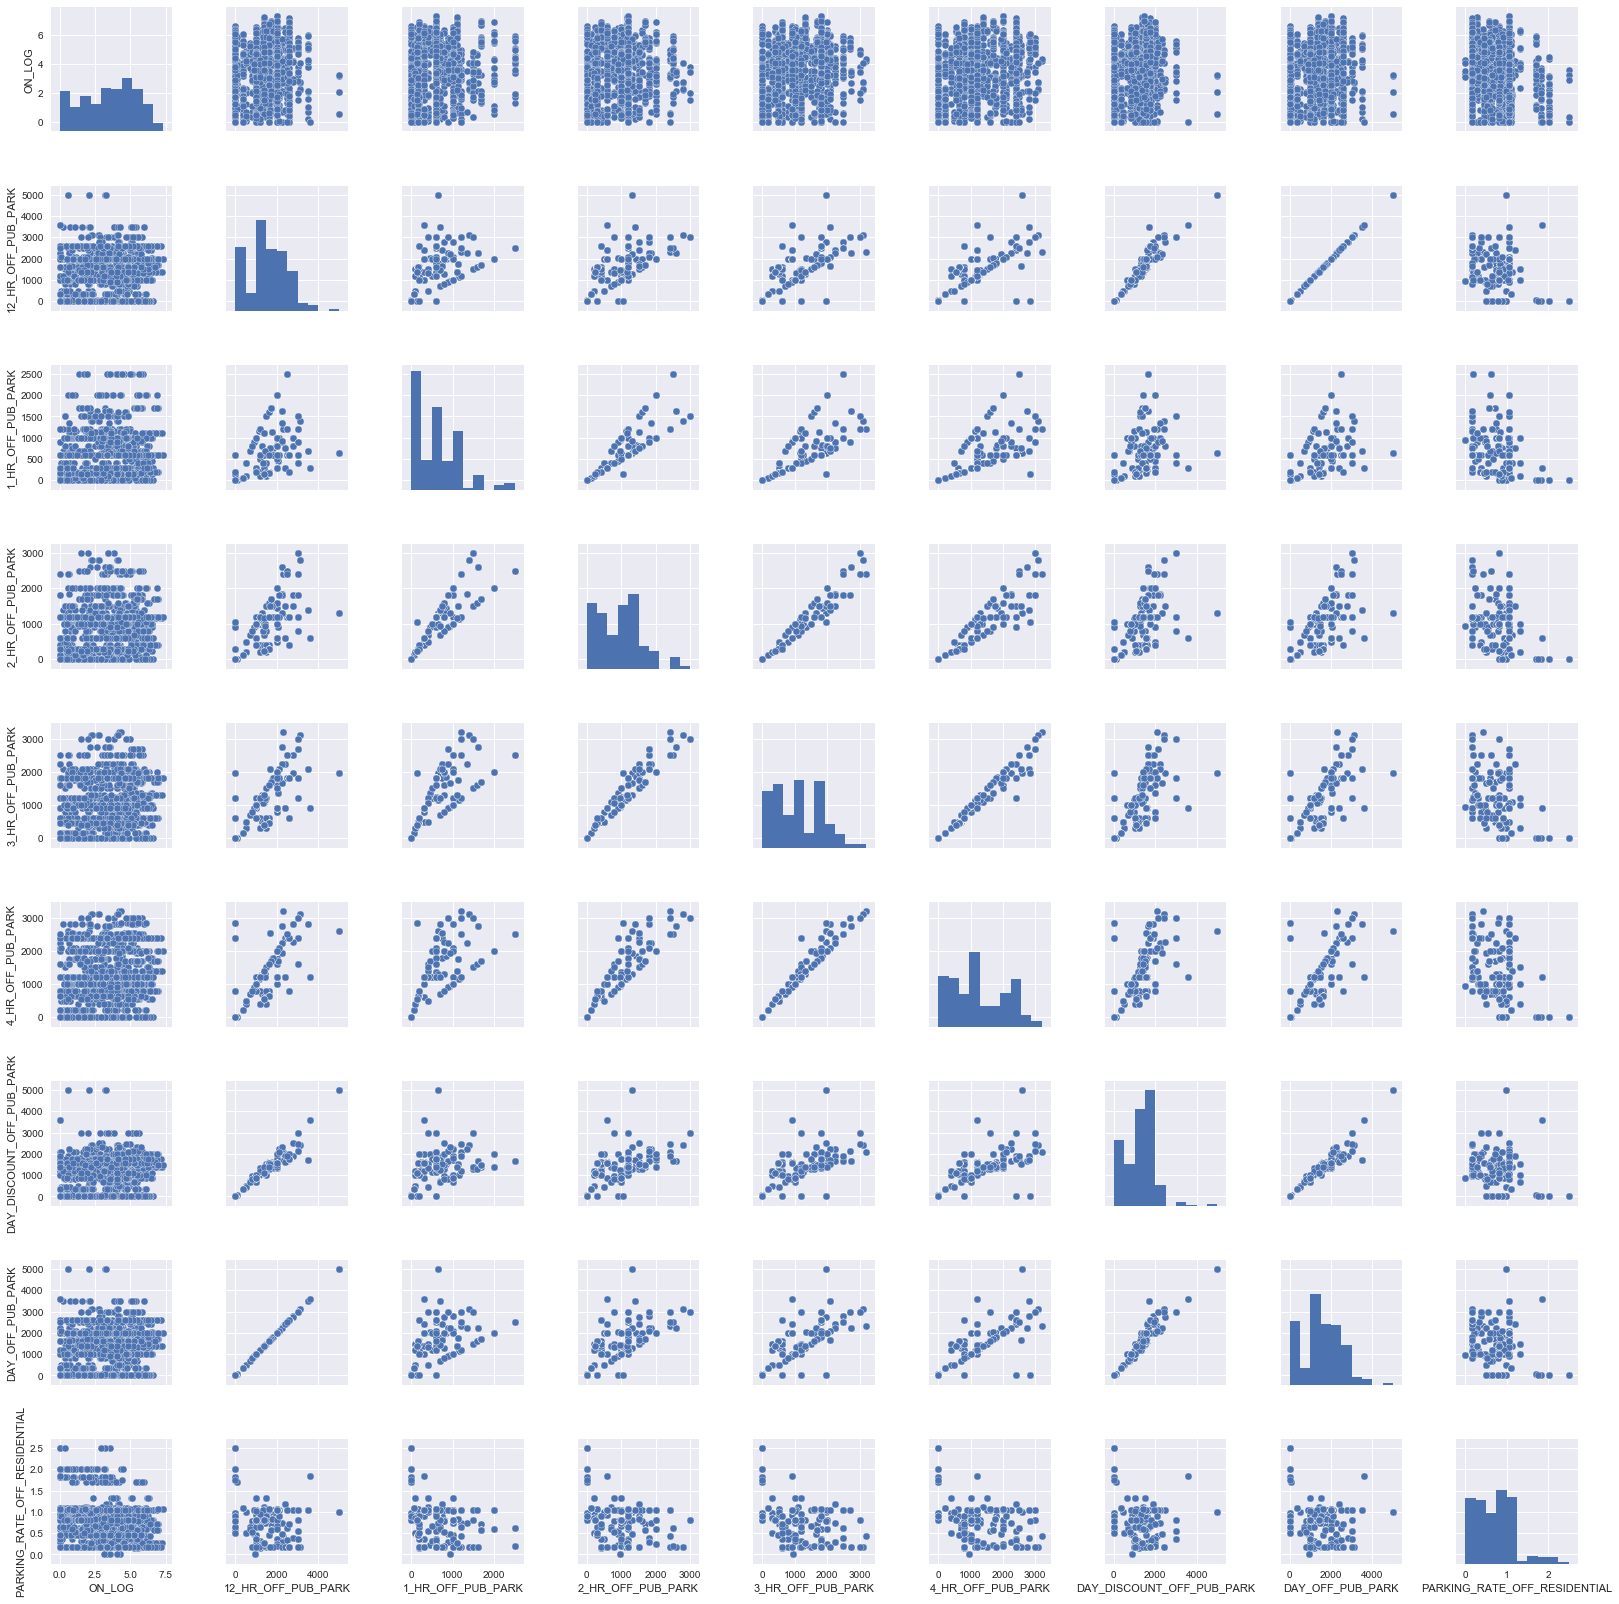

In [245]:
sns.pairplot(df[['ON_LOG','12_HR_OFF_PUB_PARK',
'1_HR_OFF_PUB_PARK',
'2_HR_OFF_PUB_PARK',
'3_HR_OFF_PUB_PARK',
'4_HR_OFF_PUB_PARK',
'DAY_DISCOUNT_OFF_PUB_PARK',
'DAY_OFF_PUB_PARK',
'PARKING_RATE_OFF_RESIDENTIAL',]].dropna())

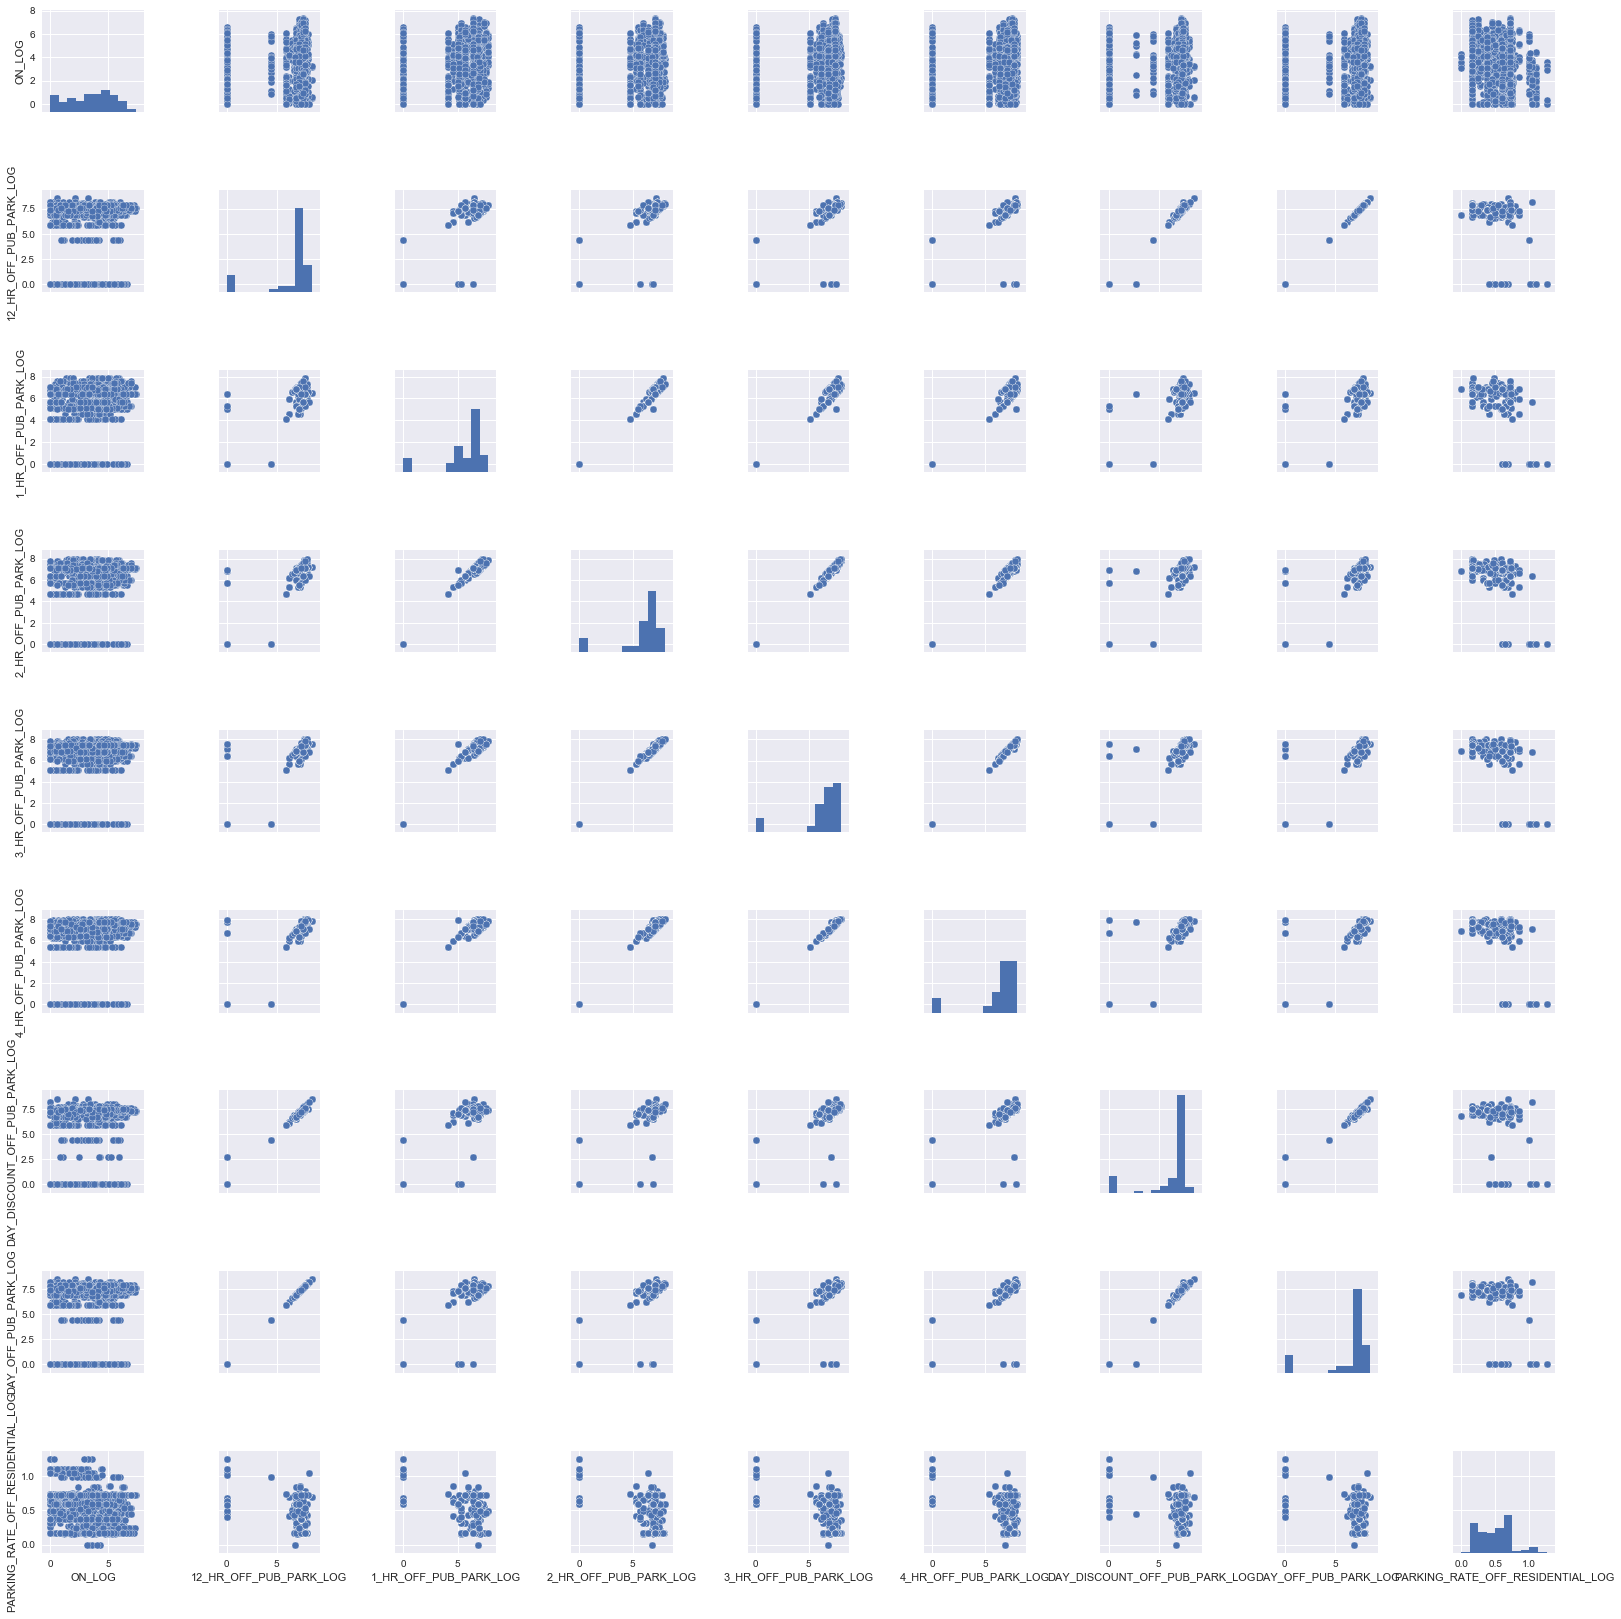

In [246]:
sns.pairplot(df[['ON_LOG','12_HR_OFF_PUB_PARK_LOG',
'1_HR_OFF_PUB_PARK_LOG',
'2_HR_OFF_PUB_PARK_LOG',
'3_HR_OFF_PUB_PARK_LOG',
'4_HR_OFF_PUB_PARK_LOG',
'DAY_DISCOUNT_OFF_PUB_PARK_LOG',
'DAY_OFF_PUB_PARK_LOG',
'PARKING_RATE_OFF_RESIDENTIAL_LOG',]].dropna())

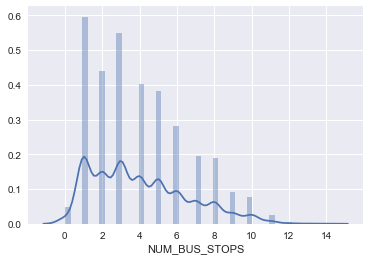

In [188]:
sns.distplot(df['NUM_BUS_STOPS'])

array([0], dtype=int64)

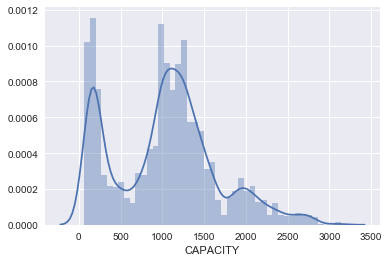

In [194]:
sns.distplot(excluded['CAPACITY'].dropna())

In [63]:
for column in df.columns.sort_values():
    print(column)

ALAND00
ARRIVAL_TIME_DEV
AVG_HH_SIZE
AVG_RIDE
AWATER00
Average Hourly Price
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
COUNTYFP00
CROWDED
CROWDHOURS
CTIDFP00
Count_
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FID_1
FULLFARE_REV
Geography
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
Id
Id2
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NAME00
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
PER_HH_0VEH
PER_INCOME_0-15
PER_INCOME_100+
PER_INCOME_15-50
PER_INCOME_50-100
POP_DEN_ACS
PRICE12HR
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR
PRICEDAY
PRICEDAYDISCOUNT
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SOL
STOP_ID
STOP_LAT
STOP_LAT_x
STOP_LAT_y
STOP_LON
STOP_LON_x
STOP_LON_y
TIM

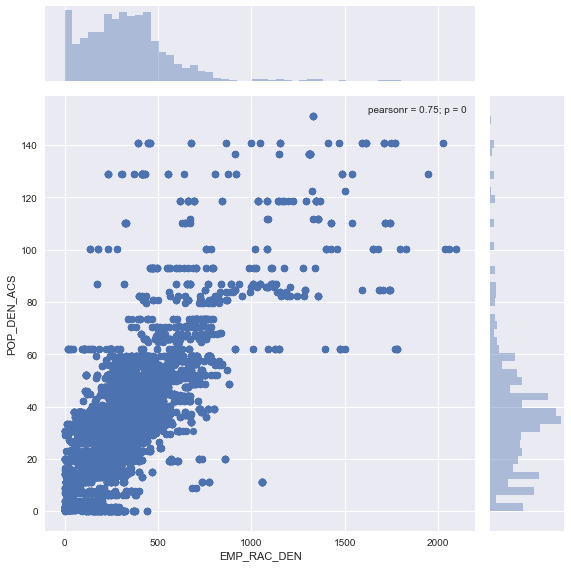

In [196]:
sns.jointplot(x="EMP_RAC_DEN", y="POP_DEN_ACS", data=df, size=8)

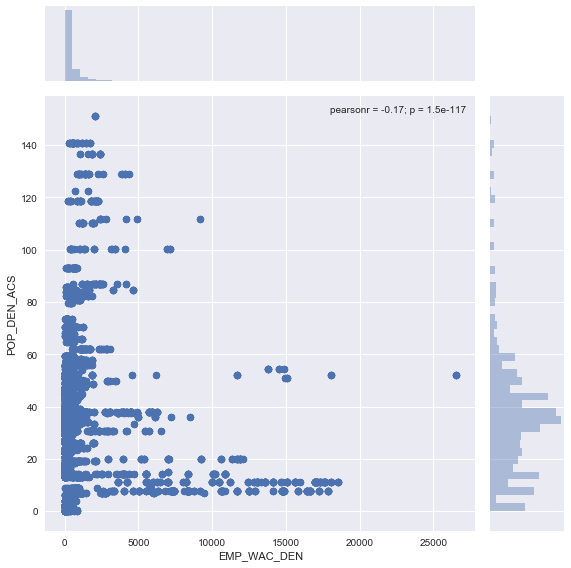

In [197]:
sns.jointplot(x="EMP_WAC_DEN", y="POP_DEN_ACS", data=df, size=8)

In [32]:
#df['MONTH'] = pd.to_datetime(df['MONTH'])

In [34]:
df['Month'] = df['MONTH'].apply(lambda row: row.month)

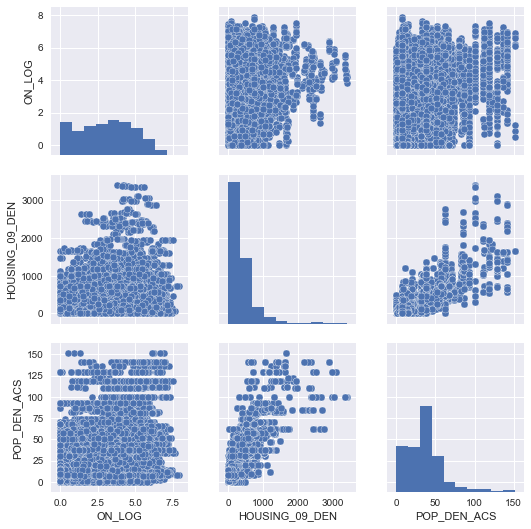

In [206]:
fig = sns.pairplot(df[[ 'ON_LOG','HOUSING_09_DEN','POP_DEN_ACS']].dropna())
fig.savefig('E:\Transit-Casa-Alex\Output\Seaborn Pictures (Data Exploration)/Census_Block_Data.jpg')

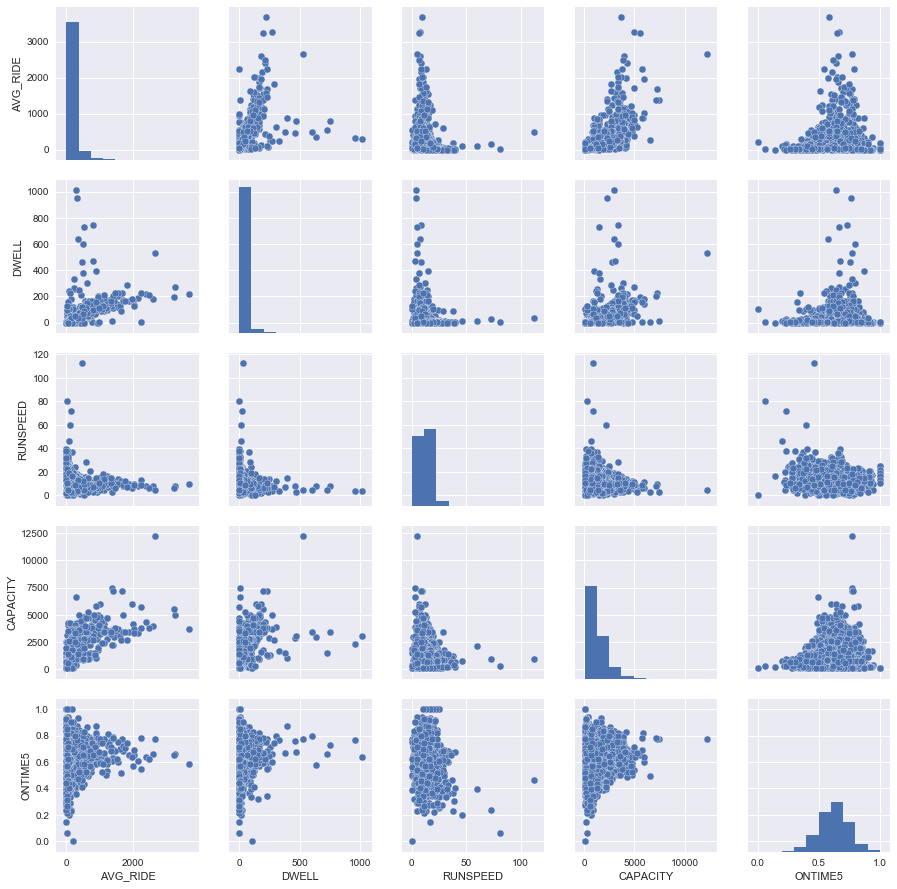

In [67]:
fig = sns.pairplot(df[['AVG_RIDE','DWELL','RUNSPEED', 'CAPACITY', 'ONTIME5']])
fig.savefig('E:\Transit-Casa-Alex\Output\Seaborn Pictures (Data Exploration)/Bus Performance.jpg')

In [68]:
import folium

In [72]:
folium.Map?